In [9]:
# Домашнее задание 4
# Небольшое исследование по tool wear

Износ 0 - 20 мин: 265 отказов
Износ 20 - 40 мин: 140 отказов
Износ 40 - 60 мин: 101 отказов
Износ 60 - 80 мин: 135 отказов
Износ 80 - 100 мин: 142 отказов
Износ 100 - 120 мин: 182 отказов
Износ 120 - 140 мин: 103 отказов
Износ 140 - 160 мин: 141 отказов
Износ 160 - 180 мин: 192 отказов
Износ 180 - 200 мин: 271 отказов
Износ 200 - 220 мин: 460 отказов
Износ 220 - 240 мин: 127 отказов


Text(0, 0.5, 'Количество отказов')

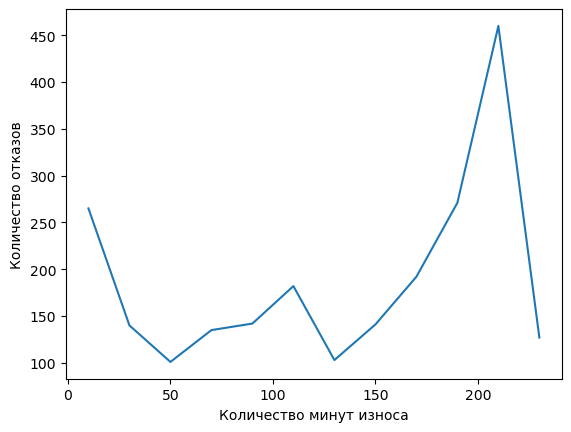

In [11]:
# Импорты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем первоначальные данные
initial_data = pd.read_csv('files/train.csv')

step = 20
for i in range(0, 240, step):
    subset_sum = initial_data.loc[((initial_data['Tool wear [min]']>=i) & 
                            (initial_data['Tool wear [min]']<=i+step)),'Machine failure'].sum()
    print(f"Износ {i} - {i+step} мин: {subset_sum} отказов")
    
plt.plot(np.array([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230]), 
        np.array([265, 140, 101, 135, 142, 182, 103, 141, 192, 271, 460, 127]))

plt.xlabel("Количество минут износа")
plt.ylabel("Количество отказов")

In [13]:
initial_data['Tool wear [min]'].mean()

104.40890133329424

In [15]:
initial_data.shape

(136429, 14)

In [17]:
initial_data['Wear square param'] = (initial_data['Tool wear [min]'] - 104.4) ** 2
initial_data_sample = initial_data.iloc[0:5000, :]

In [19]:
data_good = initial_data_sample.loc[initial_data_sample['Machine failure'] == 0]
data_failure = initial_data_sample.loc[initial_data_sample['Machine failure'] == 1]

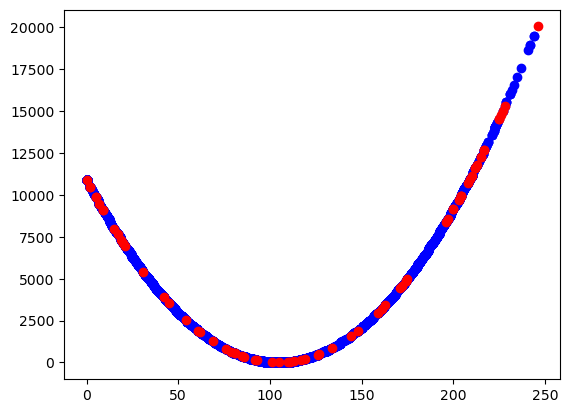

In [21]:
plt.scatter(data_good['Tool wear [min]'], data_good['Wear square param'], c='blue')
plt.scatter(data_failure['Tool wear [min]'], data_failure['Wear square param'], c='red')